Importing the necessary libraries.
#Pandas for Dataframes.
#Numpy for Mathematical Calculations.
#Matplotlib for Plotting graphs.
#Seaborn for Data Visualization.
#WordCloud and Stop Words for NLP.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import datetime
from datetime import datetime,date

Loading the CSV files in to Dataframes

In [72]:
#Generate Word Cloud with max of 200 words
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(10,10), 
                   title = None, title_size=20, image_color=False):
    stopwords = set(STOPWORDS)
    #define additional stop words that are not contained in the dictionary
    more_stopwords = {'one','of', 'Unknown','Hi','Hello','don','any','many','late','high','agree','become','because','will',
                     'go','going'}
    stopwords = stopwords.union(more_stopwords)
    #Generate the word cloud
    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    #set the plot parameters
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud);
    plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [2]:
answers = pd.read_csv(r"C:\Users\meril\Desktop\Capstone\answers.csv")

In [3]:
questions = pd.read_csv(r"C:\Users\meril\Desktop\Capstone\questions.csv")

In [4]:
students = pd.read_csv(r"C:\Users\meril\Desktop\Capstone\students.csv")

In [5]:
professionals = pd.read_csv(r"C:\Users\meril\Desktop\Capstone\professionals.csv")

#Explore each of the Datasets

In [6]:
answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51123 entries, 0 to 51122
Data columns (total 5 columns):
answers_id             51123 non-null object
answers_author_id      51123 non-null object
answers_question_id    51123 non-null object
answers_date_added     51123 non-null object
answers_body           51122 non-null object
dtypes: object(5)
memory usage: 2.0+ MB


In [7]:
answers.describe()

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
count,51123,51123,51123,51123,51122
unique,51123,10169,23110,51062,50401
top,ed4573c6bf5a49bda95eece4c085ba28,36ff3b3666df400f956f8335cf53e09e,8eb6ba7af57846acbfec5633e537192a,2017-05-10 20:50:36 UTC+0000,"<p>&lt;span style=""background-color: transpare..."
freq,1,1710,58,2,103


In [8]:
answersgroup = answers.groupby("answers_author_id")["answers_id"].count()
print(f'Mean Number of questions answered by each professional : {answersgroup.mean()}')
print(f'Minimum Number of questions answered by each professional : {answersgroup.min()}')
print(f'Maximum Number of questions answered by a professional : {answersgroup.max()}')


Mean Number of questions answered by each professional : 5.0273379880027536
Minimum Number of questions answered by each professional : 1
Maximum Number of questions answered by a professional : 1710


In [30]:
answersgroup.nlargest()

answers_author_id
36ff3b3666df400f956f8335cf53e09e    1710
58fa5e95fe9e480a9349bbb1d7faaddb    1112
a1006e6a58a0447592e2435caa230f78     915
be5d23056fcb4f1287c823beec5291e1     711
05ab77d4c6a141b999044ebbf5415b0d     616
Name: answers_id, dtype: int64

We see that the author 36ff3b3666df400f956f8335cf53e09e has answered the most number of questions.

In [31]:
ans_count = answers["answers_author_id"].value_counts().head(10)

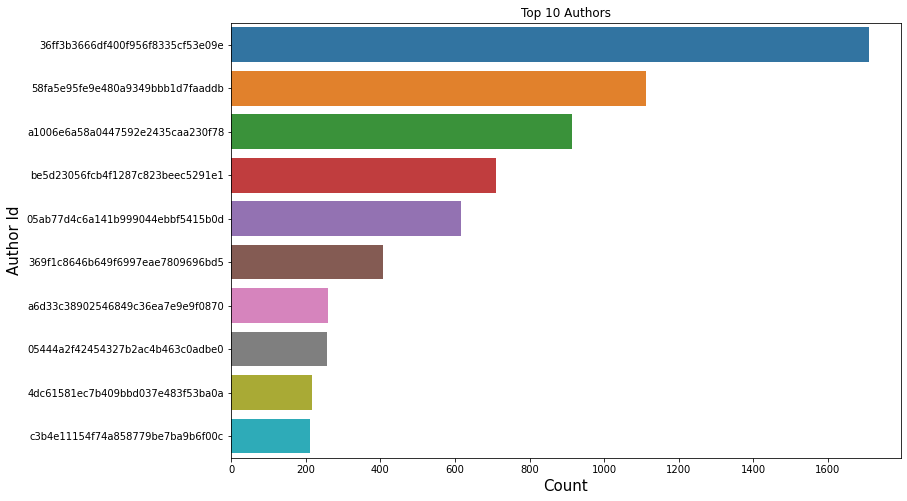

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(ans_count.values, ans_count.index)
plt.xlabel("Count", fontsize=15)
plt.ylabel("Author Id", fontsize=15)
plt.title("Top 10 Authors")
plt.show()

The above graph shows the top 10 professionals who have answered the questions.

In [33]:
answers.head(10)

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,<p>Hi. I joined the Army after I attended coll...
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000,"<p>Dear Priyanka,</p><p>Greetings! I have answ..."
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47 UTC+0000,<p>I work for a global company who values high...
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33 UTC+0000,I agree with Denise. Every single job I've had...
5,5f62fadae80748c7907e3b0551bf4203,b03c3872daeb4a5cb1d8cd510942f0c4,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-12 16:01:44 UTC+0000,Networking is a key component to progressing y...
6,1d804b3b9e764cdd90195fb138d1a5aa,f6c89fde797d45938bce3531f55c9b6b,5af8880460c141dbb02971a1a8369529,2017-09-29 18:50:11 UTC+0000,https://www.unigo.com/\n\nCheck out this websi...
7,08d3cf6fa20543ddbdc42f70a7bcae9e,5bc2db4d58584f95bdba30ed2c21d573,5af8880460c141dbb02971a1a8369529,2018-06-08 02:39:02 UTC+0000,"<p>Hi Jocelyn ,</p><p><br></p><p>May I recomme..."
8,9d33d099a03c44328fbf166aad585f63,8136c8653d3a4895b49cac90b88120d2,7c336403258f4da3a2e0955742c76462,2017-03-01 16:52:43 UTC+0000,<p>For the typical schedule it takes four year...
9,228e5feefb4e42188b7c48a5c7eb3aa8,35c8d979b56647839c8df0f0383648cd,be3c5edfdb07423e955e9b2d7f186bce,2017-10-13 18:08:20 UTC+0000,Of course! I know someone who doubled in class...


Missing values in answers dataset

In [34]:
answers.isnull().sum()

answers_id             0
answers_author_id      0
answers_question_id    0
answers_date_added     0
answers_body           1
dtype: int64

There is one missing value in the answers_body column.Since the missing value dosen't effect the dataset,we do no replace the missing values with any value.

The column answers_author_id is the id of the professional who has answered the question.
The answers_question_id is the id of the question asked.
The column names are changed accordingly.

In [35]:
answers = answers.rename(columns = {'answers_author_id':'professionals_id','answers_question_id':'questions_id'})
answers.head()

,answers_id,professionals_id,questions_id,answers_date_added,answers_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,<p>Hi. I joined the Army after I attended coll...
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000,"<p>Dear Priyanka,</p><p>Greetings! I have answ..."
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47 UTC+0000,<p>I work for a global company who values high...
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33 UTC+0000,I agree with Denise. Every single job I've had...


Creating Word Cloud for the answers_body column

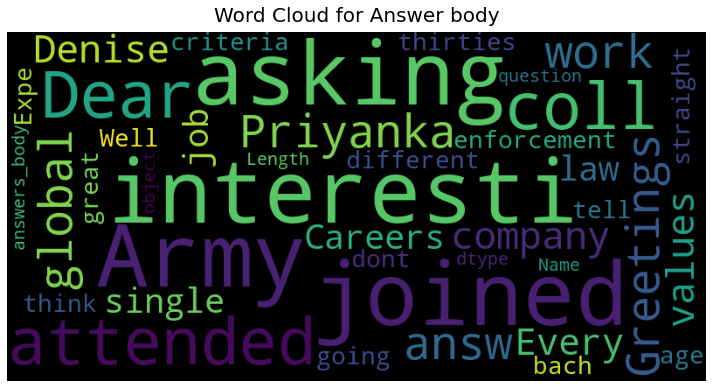

In [70]:
ans_body = answers["answers_body"]
ans_body_na = ans_body.dropna()
plot_wordcloud(ans_body_na, title="Word Cloud for Answer body")

In [27]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23931 entries, 0 to 23930
Data columns (total 5 columns):
questions_id            23931 non-null object
questions_author_id     23931 non-null object
questions_date_added    23931 non-null object
questions_title         23931 non-null object
questions_body          23931 non-null object
dtypes: object(5)
memory usage: 934.9+ KB


In [28]:
questions.describe()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
count,23931,23931,23931,23931,23931
unique,23931,12329,23869,23739,23681
top,c4825bfdd4ae43e59750de23e3bcf266,2fe767de78fa4dfd83f0021cf7712064,2016-03-01 18:53:22 UTC+0000,How do I become an IAS officer?,Accounting student at Towson university #acco...
freq,1,93,2,6,16


In [63]:
questions.isnull().sum()

questions_id            0
questions_author_id     0
questions_date_added    0
questions_title         0
questions_body          0
dtype: int64

The above cell indicates there are no missing values in the questions dataset.

Create a word corpus with the columns questions_title and questions_body

In [67]:
questions["text"] = questions["questions_title"].map(str) + " " + questions["questions_body"] 

Creating a word cloud for questions dataset

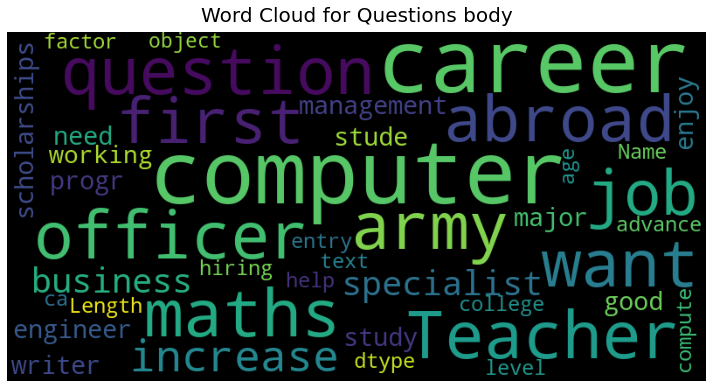

In [73]:
ques_body = questions["text"]
ques_body_na = ques_body.dropna()
plot_wordcloud(ques_body_na, title="Word Cloud for Questions body")

In [78]:
print(f'Earliest date questions were added :{questions.questions_date_added.min()}')
print(f'Most recent date questions were added : {questions.questions_date_added.max()}')

Earliest date questions were added :2011-09-27 15:23:17 UTC+0000
Most recent date questions were added : 2019-01-31 22:32:00 UTC+0000


In [ ]:
entities = [
    ('questions', questions),('answers', answers)
]

colors = {'questions' : 'cyan', 'answers' : 'mediumvioletred'}

for entity, df in entities:
    min_date = df['{}_date_added'.format(entity)].min().strftime("%B %Y")
    max_date = df['{}_date_added'.format(entity)].max().strftime("%B %Y")

    df['year'] = df['{}_date_added'.format(entity)].dt.year
    plt_data = df.groupby('year').size()
    plt_data.plot(figsize=(14, 5), color=colors[entity],  marker='o')

    x = plt_data.reset_index()['year']
    y = plt_data.reset_index()[0]
    plt.fill_between(x, y, color=colors[entity], alpha = 0.4)

    plt.xlabel('Year', fontsize=15)
    plt.ylabel('{} Count'.format(entity.capitalize()), fontsize=15)
    plt.title('Number of {} asked per year ({}-{})'.format(entity.capitalize(), min_date, max_date), fontsize=20)
    plt.show()

In [103]:
min_date = questions['questions_date_added'].min()
#min_date.strftime("%B %Y")
#min_date = datetime.strptime(min_date, '%Y-%m-%d %H:%M:%S')
#min_date = min_date.strftime("%B%Y")
min_date

'2011-09-27 15:23:17 UTC+0000'